In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
ladies = pd.read_csv('lyrics_and_artist.csv',encoding='latin-1')
ladies.head()

# encoding because of special characters

,lyrics,artist
0,"I've been drinkin', I've been drinkin'",beyonce
1,I get filthy when that liquor get into me,beyonce
2,"I've been thinkin', I've been thinkin'",beyonce
3,Why can't I keep my fingers off it?,beyonce
4,"Baby, I want you, now-now",beyonce


In [3]:
ladies['lyrics'].replace({'<|endoftext|>': None}, inplace=True)

In [4]:
ladies.isnull().sum()

lyrics    148
artist      0
dtype: int64

In [5]:
ladies.dropna(inplace=True)

In [6]:
ladies.shape

(9488, 2)

## Feature Engineering

In [7]:
ladies['character_count'] = ladies['lyrics'].map(len)
ladies['word_count'] = ladies['lyrics'].map(lambda each: len(each.split()))
ladies['unique_words_count'] = ladies['lyrics'].apply(lambda each: len(set(each.split())))
ladies['lexical_richness_of_line'] = ladies['unique_words_count'] / ladies['word_count']
ladies.head()

,lyrics,artist,character_count,word_count,unique_words_count,lexical_richness_of_line
0,"I've been drinkin', I've been drinkin'",beyonce,38,6,4,0.666667
1,I get filthy when that liquor get into me,beyonce,41,9,8,0.888889
2,"I've been thinkin', I've been thinkin'",beyonce,38,6,4,0.666667
3,Why can't I keep my fingers off it?,beyonce,35,8,8,1.000000
4,"Baby, I want you, now-now",beyonce,25,5,5,1.000000


In [8]:
# ladies.sort_values(by='song_word_count', ascending=True)[['lyrics']].head()

## Dataframe EDA

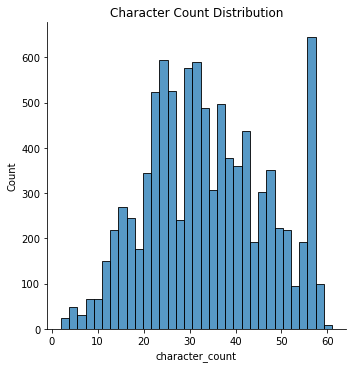

In [9]:
sns.displot(ladies['character_count'], kde=False)
plt.title('Character Count Distribution');

# character count

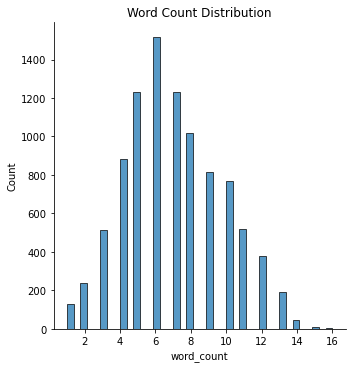

In [10]:
sns.displot(ladies['word_count'], kde=False)
plt.title('Word Count Distribution');

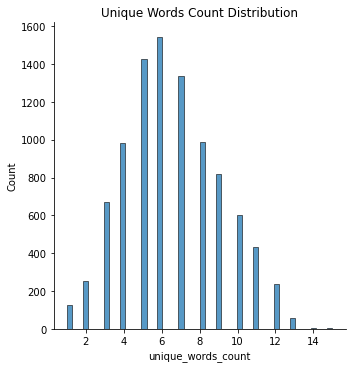

In [11]:
sns.displot(ladies['unique_words_count'], kde=False)
plt.title('Unique Words Count Distribution');

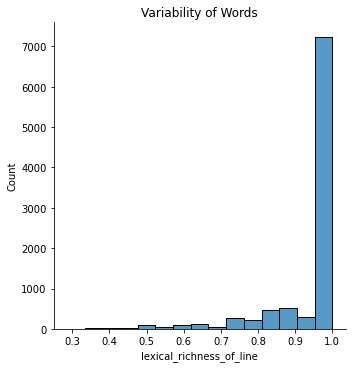

In [12]:
sns.displot(ladies['lexical_richness_of_line'], kde=False)
plt.title('Variability of Words');

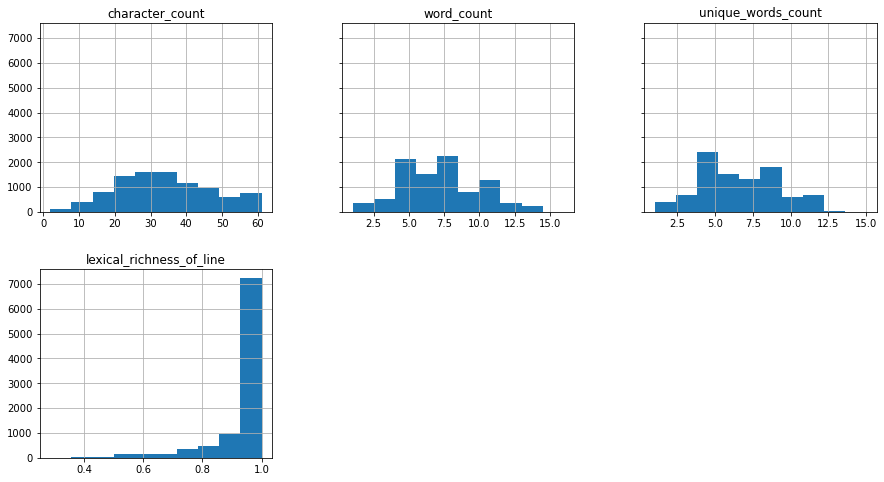

In [13]:
ladies.hist(sharey=True, layout=(2,3), figsize=(15,8))
plt.title('Distribution for all Text Analyses');

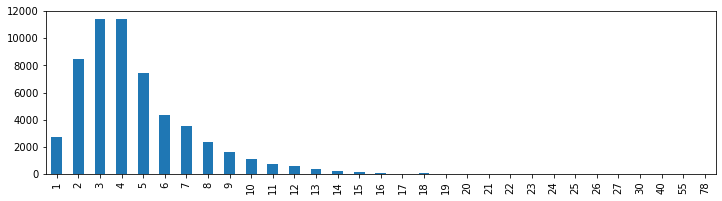

In [14]:
pd.Series(len(each) for each in ''.join(ladies.lyrics).split()).value_counts().sort_index().plot(kind='bar', figsize=(12,3))
plt.title('');

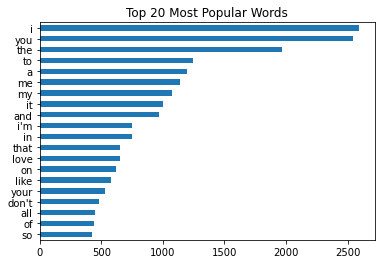

In [15]:
pd.Series(' '.join(ladies.lyrics).lower().split()).value_counts()[:20][::-1].plot(kind='barh')
plt.title('Top 20 Most Popular Words');

In [16]:
from nltk import ngrams

In [17]:
def get_ngrams_from_series(series, n=2):
    lines = ' '.join(series).lower().split('\n')
    lgrams = [ngrams(l.split(), n) for l in lines]
    grams = [[' '.join(g) for g in list(lg)] for lg in lgrams]
    return [item for sublist in grams for item in sublist]

/Users/keturananny/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 137 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/keturananny/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 137 missing from current font.
  font.set_text(s, 0, flags=flags)


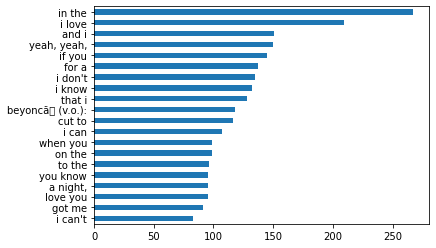

In [18]:
pd.Series(get_ngrams_from_series(ladies.lyrics,2)).value_counts()[:20][::-1].plot(kind='barh');

# top 20 most frequent sequence of 2 words

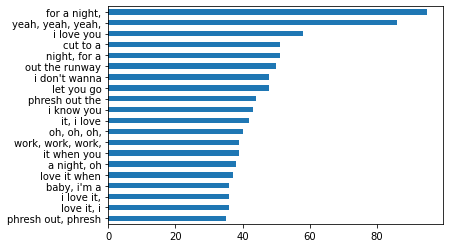

In [19]:
pd.Series(get_ngrams_from_series(ladies.lyrics,3)).value_counts()[:20][::-1].plot(kind='barh');

# top 20 most frequent sequence of 3 words

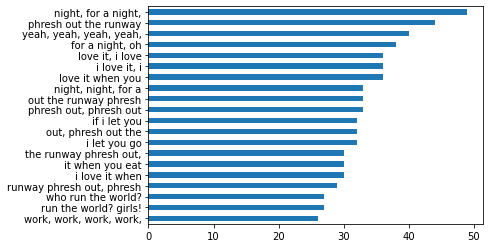

In [20]:
pd.Series(get_ngrams_from_series(ladies.lyrics,4)).value_counts()[:20][::-1].plot(kind='barh');

# top 20 most frequent sequence of 4 words

In [21]:
# scatter text for entire dataframe

## EDA for Beyonce vs. Rihanna

In [22]:
ladies[ladies['artist'] =='beyonce'].sort_values(by='word_count', ascending=True)[['lyrics']].head()

,lyrics
4217,Woza
251,Hello!
252,Bzz-bzz-bzz-bzz-bzz-bzzwop
4418,Hello
4419,Hello


In [23]:
ladies[ladies['artist'] =='rihanna'].sort_values(by='word_count', ascending=True)[['lyrics']].head()

,lyrics
9120,Yeah
6315,Ooh
6310,Oh
6672,Whoa
6673,Anymore


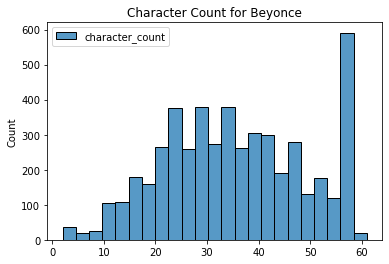

In [24]:
# the distribution of the top 10 most popular lyrics in Beyonce's lyrics
sns.histplot(ladies[ladies['artist'] == 'beyonce'].sort_values(by ='character_count')[['character_count']])
plt.title('Character Count for Beyonce');

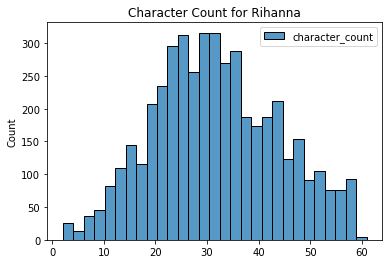

In [25]:
sns.histplot(ladies[ladies['artist'] == 'rihanna'].sort_values(by ='character_count')[['character_count']])
plt.title('Character Count for Rihanna');

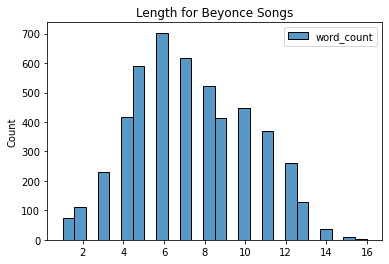

In [26]:
sns.histplot(ladies[ladies['artist'] == 'beyonce'].sort_values(by ='word_count')[['word_count']])
plt.title('Length for Beyonce Songs');

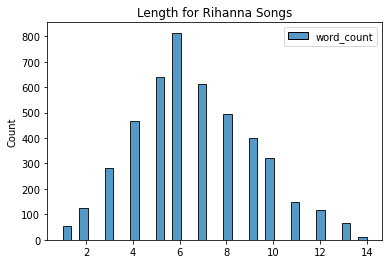

In [27]:
sns.histplot(ladies[ladies['artist'] == 'rihanna'].sort_values(by ='word_count')[['word_count']])
plt.title('Length for Rihanna Songs');

In [28]:
#sns.histplot(ladies[ladies['artist'] == 'beyonce'].sort_values(by ='word_count')[['word_count']])
#plt.title('Word Count for Beyonce Lyrics');

In [29]:
#sns.histplot(ladies[ladies['artist'] == 'rihanna'].sort_values(by ='line_word_count')[['line_word_count']])
#plt.title('Word Count for Rihanna Lyrics');

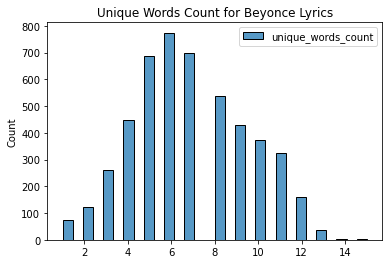

In [34]:
sns.histplot(ladies[ladies['artist'] == 'beyonce'].sort_values(by ='unique_words_count')[['unique_words_count']])
plt.title('Unique Words Count for Beyonce Lyrics');

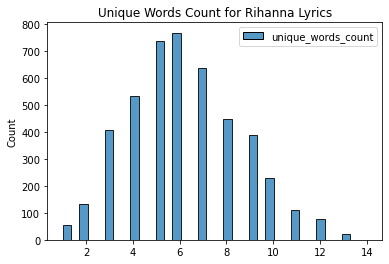

In [35]:
sns.histplot(ladies[ladies['artist'] == 'rihanna'].sort_values(by ='unique_words_count')[['unique_words_count']], label='rihanna')
plt.title('Unique Words Count for Rihanna Lyrics');

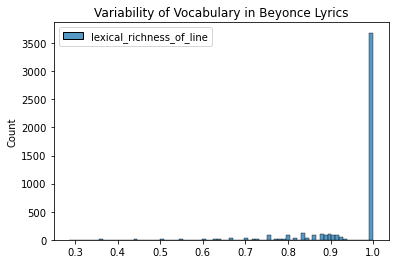

In [38]:
sns.histplot(ladies[ladies['artist'] == 'beyonce'].sort_values(by ='lexical_richness_of_line')[['lexical_richness_of_line']])
plt.title('Variability of Vocabulary in Beyonce Lyrics');

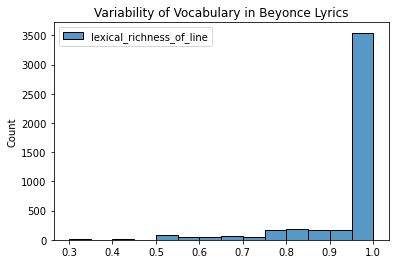

In [33]:
sns.histplot(ladies[ladies['artist'] == 'rihanna'].sort_values(by ='lexical_richness_of_line')[['lexical_richness_of_line']])
plt.title('Variability of Vocabulary in Beyonce Lyrics');

In [ ]:
# scatter text for just Beyonce lyrics

In [ ]:
# scatter text for just Rihanna lyrics

In [ ]:
#import spacy
#import scattertext as st
#from pprint import pprint

In [ ]:
#def term_frequency(ladies):
  #  corpus =  (scattertext.CorpusFromPandas(ladies,
 #                                          category_col='lexical_richness',
 #                                           text_col='lyrics',
 #                                          nlp=nlp)
  #            .build()
  #             .remove_terms(nlp.Defaults.stop_words, ignore_absences=True))
  #  ladies = corpus.get_term_frequency_df()
   # ladies['High_Rating_Score'] = corpus.get_scaled_f_scores('High Rating')
   # ladies['Low_Rating_Score'] = corpus.get_scaled_f_scores('Low Rating')
   # ladies['High_Rating_Score'] = round(ladies['High_Rating_Score'], 2)
   # ladies['Low_Rating_Score'] = round(ladies['Low_Rating_Score'], 2)
    
   # ladies_high = ladies.sort_values(by='High Rating Freq',
   #                                 ascending=False).reset_index()
   # ladies_low = ladies.sort_values(by='Low Rating Frequency',
  #                                 ascending=False).reset_index()
   # return ladies_high, ladies_low

In [ ]:
# corpus_dataframe = df_Park_Camp
# html = scattertext.produce_scattertext_explorer(
                 #  corpus,
                 #  category='Low Rating',
                  # category_name='Low Rating',
                  # not_category_name='High Rating',
                  # width_in_pixels=1000,
                  # metadata=corpus_dataframe['name'])

In [ ]:
# ladies_df = st.SampleCorpora.Ladies.get_data()